In [ ]:
from gdown import download
file_url = 'https://drive.google.com/uc?id=1tUt8Kwa_HOEaefVDmZ0_R5AsqiEsNY-T'
download(file_url, quiet=True);

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d giripujar/hr-analytics
!unzip hr-analytics.zip

!rm hr-analytics.zip

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 67.2MB/s]
Archive:  hr-analytics.zip
replace HR_comma_sep.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

<h2 style="color:purple">Data exploration and visualization</h2>

In [3]:
left = df[df.left==1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

**Average numbers for all columns**

In [5]:
df.groupby('left').mean()

TypeError: agg function failed [how->mean,dtype->object]

From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

**Impact of salary on employee retention**

<Axes: xlabel='salary'>

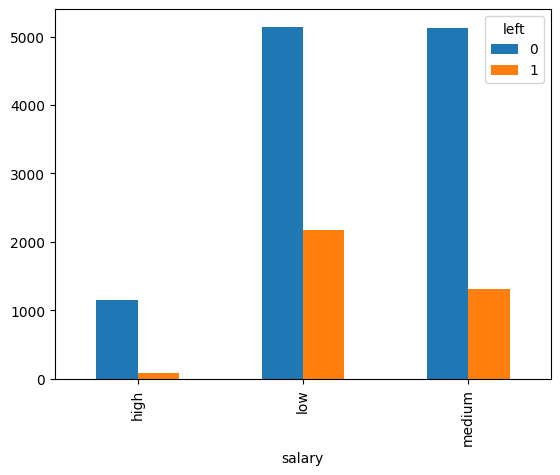

In [6]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

<Axes: xlabel='Department'>

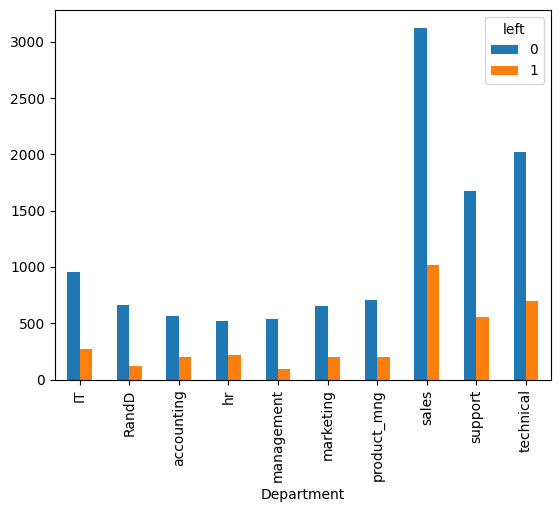

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [8]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low

**Tackle salary dummy variable**

In [9]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [10]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [11]:
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   salary_high  salary_low  salary_medium  
0        False        True          False  
1        False       False           True  
2        False       False           True  
3        False        True          False  
4        False        True          False

Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [12]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0        False        True          False  
1        False       False           True  
2        False       False           True  
3        False        True          False  
4        False        True          False

In [13]:
X = df_with_dummies
X.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0        False        True          False  
1        False       False           True  
2        False       False           True  
3        False        True          False  
4        False        True          False

In [14]:
y = df.left

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

**Accuracy of the model**

In [34]:
model.score(X_test,y_test)

0.7746666666666666